In [1]:
# code taken from here: https://medium.com/swlh/tweet-sentiment-analysis-using-python-for-complete-beginners-4aeb4456040
# code also influenced from here: https://www.kaggle.com/code/ragnisah/text-data-cleaning-tweets-analysis/notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
Tweet_Data = pd.read_csv('Tweet_Data.csv')

stop_words=stopwords.words('english')
stemmer=PorterStemmer()

In [2]:
Tweet_Data.shape 

(50854, 5)

In [3]:
Tweet_Data['Tweet'] = Tweet_Data['Tweet'].astype(str)

In [4]:
tweets = Tweet_Data['Tweet']
tweets

0                                                                                  @TahaMArvas yes yes it is
1        It has been an absolute shitter of a year, in multiple ways, and there's no getting around that....
2                                                   @Dryad90 hairdresser's away until 6th January, nightmare
3        #2009vs2019 \n\nTen years on and here I am, still looking like a budget Macaulay Culkin https://...
4        The most predictable thing in the world is anti-trans activists rushing to defend homophobic cra...
                                                        ...                                                 
50849                                 The pathological animus of the New York Times  https://t.co/NP5Nv41Nu9
50850    @Oooh_Matron Eh? Have never even written about any trans woman. Think you’ve confused me with so...
50851                                                        https://t.co/8YG0BHe0J6 https://t.co/aZS1GsICmq
50852              

<AxesSubplot:xlabel='View', ylabel='count'>

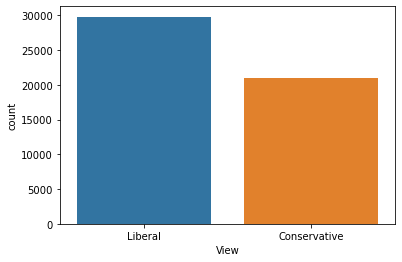

In [5]:
sns.countplot(x = 'View', data = Tweet_Data)

In [6]:
Tweet_Data['View'].value_counts()

Liberal         29806
Conservative    21048
Name: View, dtype: int64

In [7]:
Tweet_Data['View'] = Tweet_Data['View'].astype(str)

In [8]:
Truth_Query = Tweet_Data[(Tweet_Data['View'] != "Liberal") & (Tweet_Data['View'] != 'Conservative')]#finding the rows

In [9]:
Tweet_Data_Liberal = Tweet_Data.loc[(Tweet_Data["View"] == "Liberal")]
Tweet_Data_Liberal.shape

(29806, 5)

In [10]:
Tweet_Data_Conservative = Tweet_Data.loc[(Tweet_Data["View"] == "Conservative")]
Tweet_Data_Conservative.shape

(21048, 5)

In [11]:
Tweet_Data = pd.concat([Tweet_Data_Conservative, Tweet_Data_Liberal])
Tweet_Data.shape

(50854, 5)

In [12]:
def remove_usernames_links(tweet):
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('http[^\s]+','',tweet)
    return tweet
Tweet_Data['Tweet'] = Tweet_Data['Tweet'].apply(remove_usernames_links)
Tweet_Data.shape

(50854, 5)

In [13]:
# code from here: https://s-hosseinkhani1999.medium.com/remove-all-kind-of-emojis-with-the-demoji-package-python-643a530491f4
import demoji
demoji.download_codes()
def remove_em(text):
    dem = demoji.findall(text)
    for item in dem.keys():
        text = text.replace(item, '')
    return text
Tweet_Data['Tweet'] = Tweet_Data['Tweet'].apply(remove_em)
Tweet_Data.shape

/var/folders/j1/xwlyd2kd5hb4q6nbz5k6s9v80000gn/T/ipykernel_81624/2987164781.py:3: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


(50854, 5)

In [14]:
# code taken from here:https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

#library that contains punctuation
import string
string.punctuation

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
Tweet_Data['clean_tweet']= Tweet_Data['Tweet'].apply(lambda x:remove_punctuation(x))
Tweet_Data.shape

(50854, 6)

In [15]:
Tweet_Data['tweet_lower']= Tweet_Data['clean_tweet'].apply(lambda x: x.lower())
Tweet_Data.head()

,Unnamed: 0,Date,User,Tweet,View,clean_tweet,tweet_lower
29806,0,2019-12-21 15:00:53+00:00,SuellaBraverman,Cackling from the SNP is easy to deal with. It’s obvious they still don’t respect referendum re...,Conservative,Cackling from the SNP is easy to deal with It’s obvious they still don’t respect referendum res...,cackling from the snp is easy to deal with it’s obvious they still don’t respect referendum res...
29807,1,2019-12-20 12:16:32+00:00,SuellaBraverman,Pleased to back in the Chamber to speak in support of the EU Withdrawal Bill this morning. This...,Conservative,Pleased to back in the Chamber to speak in support of the EU Withdrawal Bill this morning This ...,pleased to back in the chamber to speak in support of the eu withdrawal bill this morning this ...
29808,2,2019-12-16 18:03:06+00:00,SuellaBraverman,Back to today and looking forward to a busy week when we start a bright new chapter for our cou...,Conservative,Back to today and looking forward to a busy week when we start a bright new chapter for our cou...,back to today and looking forward to a busy week when we start a bright new chapter for our cou...
29809,3,2019-12-13 05:41:53+00:00,SuellaBraverman,"Thank you for your unstinting support. Great teamwork in the rain, the cold and the dark! All ...",Conservative,Thank you for your unstinting support Great teamwork in the rain the cold and the dark All pat...,thank you for your unstinting support great teamwork in the rain the cold and the dark all pat...
29810,4,2019-12-13 05:02:06+00:00,SuellaBraverman,"Thank you Fareham for re-electing me to serve as your MP. Humbled, grateful and honoured to work...",Conservative,Thank you Fareham for reelecting me to serve as your MP Humbled grateful and honoured to work fo...,thank you fareham for reelecting me to serve as your mp humbled grateful and honoured to work fo...


In [16]:
#defining function for tokenization
import re
from nltk.tokenize import word_tokenize 
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens
#applying function to the column
Tweet_Data['tweet_tokenised']= Tweet_Data['tweet_lower'].apply(lambda x: tokenization(x))
Tweet_Data.shape

(50854, 8)

In [17]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

Tweet_Data['no_stopwords']= Tweet_Data['tweet_tokenised'].apply(lambda x:remove_stopwords(x))


In [18]:
Tweet_Data.shape

(50854, 9)

In [19]:
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
Tweet_Data['tweet_stemmed']=Tweet_Data['no_stopwords'].apply(lambda x: stemming(x))
Tweet_Data.shape

(50854, 10)

In [20]:
#nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
Tweet_Data['tweet_lemmatized']=Tweet_Data['no_stopwords'].apply(lambda x:lemmatizer(x))
Tweet_Data.shape

(50854, 11)

In [21]:
Headlines = pd.read_csv('Headlines.csv')
Headlines

,Unnamed: 0,Date,User,Tweet
0,0,2019-04-30 23:55:05+00:00,nytimes,2 people were fatally shot and at least 4 others injured in an attack at the University of North...
1,1,2019-04-30 23:36:00+00:00,nytimes,The letter adds to the growing evidence of a rift between them and is another sign of the anger ...
2,2,2019-04-30 23:23:33+00:00,nytimes,Breaking News: Robert Mueller wrote a letter to the attorney general objecting to his characteri...
3,3,2019-04-30 23:00:04+00:00,nytimes,Evening Briefing: Here's what you need to know at the end of the day https://t.co/9jh1P3TnCH
4,4,2019-04-30 22:45:04+00:00,nytimes,"In Opinion\n\nPamela Druckerman writes: ""My French is still riddled with gaps and mistakes. When..."
...,...,...,...,...
11016,1569,2019-04-01 02:35:54+00:00,BBCNews,Rapper Nipsey Hussle shot dead in Los Angeles https://t.co/IG0sciu2ZU
11017,1570,2019-04-01 02:11:11+00:00,BBCNews,Turkey local elections: Early result puts opposition ahead in Ankara https://t.co/eSWVM5g7sx
11018,1571,2019-04-01 00:41:07+00:00,BBCNews,Uncovering Nazi massacre of Jews on Belarus building site https://t.co/NPlglWROeB
11019,1572,2019-04-01 00:32:08+00:00,BBCNews,'A lot of the team started to get ill' https://t.co/lnW1NM0RaG


In [22]:
Headlines['Tweet'] = Headlines['Tweet'].astype(str)
Headlines['Tweet'] = Headlines['Tweet'].apply(remove_usernames_links)
Headlines['Tweet'] = Headlines['Tweet'].apply(remove_em)
Headlines['clean_tweet']= Headlines['Tweet'].apply(lambda x:remove_punctuation(x))
Headlines['tweet_lower']= Headlines['clean_tweet'].apply(lambda x: x.lower())
Headlines['tweet_tokenised']= Headlines['tweet_lower'].apply(lambda x: tokenization(x))
Headlines['no_stopwords']= Headlines['tweet_tokenised'].apply(lambda x:remove_stopwords(x))
Headlines['tweet_lemmatized']=Headlines['no_stopwords'].apply(lambda x:lemmatizer(x))
Headlines.head()

,Unnamed: 0,Date,User,Tweet,clean_tweet,tweet_lower,tweet_tokenised,no_stopwords,tweet_lemmatized
0,0,2019-04-30 23:55:05+00:00,nytimes,2 people were fatally shot and at least 4 others injured in an attack at the University of North...,2 people were fatally shot and at least 4 others injured in an attack at the University of North...,2 people were fatally shot and at least 4 others injured in an attack at the university of north...,"[2, people, were, fatally, shot, and, at, least, 4, others, injured, in, an, attack, at, the, un...","[2, people, fatally, shot, least, 4, others, injured, attack, university, north, carolina, charl...","[2, people, fatally, shot, least, 4, others, injured, attack, university, north, carolina, charl..."
1,1,2019-04-30 23:36:00+00:00,nytimes,The letter adds to the growing evidence of a rift between them and is another sign of the anger ...,The letter adds to the growing evidence of a rift between them and is another sign of the anger ...,the letter adds to the growing evidence of a rift between them and is another sign of the anger ...,"[the, letter, adds, to, the, growing, evidence, of, a, rift, between, them, and, is, another, si...","[letter, adds, growing, evidence, rift, another, sign, anger, among, special, counsel, ’, invest...","[letter, add, growing, evidence, rift, another, sign, anger, among, special, counsel, ’, investi..."
2,2,2019-04-30 23:23:33+00:00,nytimes,Breaking News: Robert Mueller wrote a letter to the attorney general objecting to his characteri...,Breaking News Robert Mueller wrote a letter to the attorney general objecting to his characteriz...,breaking news robert mueller wrote a letter to the attorney general objecting to his characteriz...,"[breaking, news, robert, mueller, wrote, a, letter, to, the, attorney, general, objecting, to, h...","[breaking, news, robert, mueller, wrote, letter, attorney, general, objecting, characterization,...","[breaking, news, robert, mueller, wrote, letter, attorney, general, objecting, characterization,..."
3,3,2019-04-30 23:00:04+00:00,nytimes,Evening Briefing: Here's what you need to know at the end of the day,Evening Briefing Heres what you need to know at the end of the day,evening briefing heres what you need to know at the end of the day,"[evening, briefing, heres, what, you, need, to, know, at, the, end, of, the, day]","[evening, briefing, heres, need, know, end, day]","[evening, briefing, here, need, know, end, day]"
4,4,2019-04-30 22:45:04+00:00,nytimes,"In Opinion\n\nPamela Druckerman writes: ""My French is still riddled with gaps and mistakes. When...",In Opinion\n\nPamela Druckerman writes My French is still riddled with gaps and mistakes When I ...,in opinion\n\npamela druckerman writes my french is still riddled with gaps and mistakes when i ...,"[in, opinion, pamela, druckerman, writes, my, french, is, still, riddled, with, gaps, and, mista...","[opinion, pamela, druckerman, writes, french, still, riddled, gaps, mistakes, try, tell, story, ...","[opinion, pamela, druckerman, writes, french, still, riddled, gap, mistake, try, tell, story, fr..."


In [23]:
# calculating the sentiment scores for tweets
# code taken from here: https://www.analyticsvidhya.com/blog/2021/12/different-methods-for-calculating-sentiment-score-of-text/
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent = SentimentIntensityAnalyzer()
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in Tweet_Data['Tweet']]
Tweet_Data['sentiment_score'] = polarity

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/douglaswood/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
#sentiment score for the newspaper headlines
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in Headlines['Tweet']]
Headlines['sentiment_score'] = polarity
Headlines.head()

,Unnamed: 0,Date,User,Tweet,clean_tweet,tweet_lower,tweet_tokenised,no_stopwords,tweet_lemmatized,sentiment_score
0,0,2019-04-30 23:55:05+00:00,nytimes,2 people were fatally shot and at least 4 others injured in an attack at the University of North...,2 people were fatally shot and at least 4 others injured in an attack at the University of North...,2 people were fatally shot and at least 4 others injured in an attack at the university of north...,"[2, people, were, fatally, shot, and, at, least, 4, others, injured, in, an, attack, at, the, un...","[2, people, fatally, shot, least, 4, others, injured, attack, university, north, carolina, charl...","[2, people, fatally, shot, least, 4, others, injured, attack, university, north, carolina, charl...",-0.88
1,1,2019-04-30 23:36:00+00:00,nytimes,The letter adds to the growing evidence of a rift between them and is another sign of the anger ...,The letter adds to the growing evidence of a rift between them and is another sign of the anger ...,the letter adds to the growing evidence of a rift between them and is another sign of the anger ...,"[the, letter, adds, to, the, growing, evidence, of, a, rift, between, them, and, is, another, si...","[letter, adds, growing, evidence, rift, another, sign, anger, among, special, counsel, ’, invest...","[letter, add, growing, evidence, rift, another, sign, anger, among, special, counsel, ’, investi...",-0.08
2,2,2019-04-30 23:23:33+00:00,nytimes,Breaking News: Robert Mueller wrote a letter to the attorney general objecting to his characteri...,Breaking News Robert Mueller wrote a letter to the attorney general objecting to his characteriz...,breaking news robert mueller wrote a letter to the attorney general objecting to his characteriz...,"[breaking, news, robert, mueller, wrote, a, letter, to, the, attorney, general, objecting, to, h...","[breaking, news, robert, mueller, wrote, letter, attorney, general, objecting, characterization,...","[breaking, news, robert, mueller, wrote, letter, attorney, general, objecting, characterization,...",0.38
3,3,2019-04-30 23:00:04+00:00,nytimes,Evening Briefing: Here's what you need to know at the end of the day,Evening Briefing Heres what you need to know at the end of the day,evening briefing heres what you need to know at the end of the day,"[evening, briefing, heres, what, you, need, to, know, at, the, end, of, the, day]","[evening, briefing, heres, need, know, end, day]","[evening, briefing, here, need, know, end, day]",0.00
4,4,2019-04-30 22:45:04+00:00,nytimes,"In Opinion\n\nPamela Druckerman writes: ""My French is still riddled with gaps and mistakes. When...",In Opinion\n\nPamela Druckerman writes My French is still riddled with gaps and mistakes When I ...,in opinion\n\npamela druckerman writes my french is still riddled with gaps and mistakes when i ...,"[in, opinion, pamela, druckerman, writes, my, french, is, still, riddled, with, gaps, and, mista...","[opinion, pamela, druckerman, writes, french, still, riddled, gaps, mistakes, try, tell, story, ...","[opinion, pamela, druckerman, writes, french, still, riddled, gap, mistake, try, tell, story, fr...",-0.36


In [25]:
Tweet_Data.shape

(50854, 12)

In [26]:
import gensim 
from gensim.models import Word2Vec

In [27]:
from gensim.models import KeyedVectors
google_word2vec = KeyedVectors.load_word2vec_format('/Users/douglaswood/Documents/Postgraduate/Dissertation/GoogleNews-vectors-negative300.bin', binary=True)
x = google_word2vec.word_vec("test")

In [28]:
print(x)

[-1.42578125e-01 -3.68652344e-02  1.35742188e-01 -6.20117188e-02
  7.95898438e-02  1.90429688e-02 -8.15429688e-02 -1.27929688e-01
 -2.95410156e-02  2.36328125e-01 -1.21582031e-01 -2.14843750e-01
  1.29882812e-01 -2.70996094e-02 -5.20019531e-02  2.15820312e-01
 -1.81640625e-01  5.10253906e-02 -1.60156250e-01 -1.76757812e-01
  1.83105469e-02 -4.12597656e-02 -2.32421875e-01 -1.03149414e-02
  1.45507812e-01  5.24902344e-02 -3.96484375e-01 -1.92871094e-02
  2.51770020e-03 -1.26953125e-02 -4.39453125e-02  3.07617188e-02
  9.57031250e-02 -1.75781250e-01  1.04370117e-02  1.89453125e-01
 -2.36328125e-01  4.37011719e-02  2.81250000e-01 -2.07519531e-02
 -1.81640625e-01 -2.17773438e-01  2.33398438e-01  5.29785156e-02
 -1.13769531e-01  9.39941406e-03 -1.49414062e-01  1.99218750e-01
 -1.75781250e-01  3.16406250e-01  8.10546875e-02 -6.12792969e-02
 -1.52343750e-01 -1.81884766e-02  8.25195312e-02  8.74023438e-02
 -1.18652344e-01 -2.59765625e-01 -1.68457031e-02  1.87988281e-02
  1.36108398e-02 -2.39257

In [29]:
#Abandoned due to hardware constraints
#from gensim.scripts.glove2word2vec import glove2word2vec
#glove_input_file = '/Users/douglaswood/Documents/Postgraduate/Dissertation/glove.twitter.27B/glove.twitter.27B.50d.txt'
#word2vec_output_file = '/Users/douglaswood/Documents/Postgraduate/Dissertation/glove.twitter.27B/glove.6B.50d.txt.word2vec'
#glove2word2vec(glove_input_file, word2vec_output_file)

In [30]:
# function taken from here: https://github.com/PradipNichite/Youtube-Tutorials/blob/main/Yotutube_WordVectors.ipynb
def sent_vec_google(sent):
    vector_size = google_word2vec.vector_size
    google_word2vec_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in google_word2vec:
            ctr += 1
            google_word2vec_res += google_word2vec[w]
    google_word2vec_res = google_word2vec_res/ctr
    return google_word2vec_res

In [31]:
Tweet_Data['google_vec'] = Tweet_Data['tweet_lemmatized'].apply(sent_vec_google)
print(Tweet_Data['google_vec'])

29806    [0.072686767578125, 0.03382568359375, -0.00826416015625, 0.09387016296386719, -0.099069213867187...
29807    [-0.030074270148026317, 0.05747935646458676, -0.018577174136513157, 0.05003171218068976, -0.0968...
29808    [0.008065223693847656, 0.08214314778645833, 0.059438069661458336, 0.015360514322916666, 0.001251...
29809    [0.031150124289772728, 0.05148835615678267, -0.0014537464488636363, 0.025479403409090908, 0.0045...
29810    [-0.09069442749023438, 0.036504268646240234, 0.001956939697265625, 0.049072265625, 0.03057861328...
                                                        ...                                                 
29801    [0.0522796630859375, -0.0186279296875, 0.0580322265625, 0.137139892578125, -0.12333984375, -0.02...
29802    [-0.013625081380208333, 0.0385009765625, 0.058854166666666666, 0.125048828125, -0.07775065104166...
29803    [0.03856201171875, -0.015447998046875, 0.022607421875, 0.1852142333984375, -0.1039093017578125, ...
29804    [0.0687208

In [32]:
Tweet_Data

,Unnamed: 0,Date,User,Tweet,View,clean_tweet,tweet_lower,tweet_tokenised,no_stopwords,tweet_stemmed,tweet_lemmatized,sentiment_score,google_vec
29806,0,2019-12-21 15:00:53+00:00,SuellaBraverman,Cackling from the SNP is easy to deal with. It’s obvious they still don’t respect referendum re...,Conservative,Cackling from the SNP is easy to deal with It’s obvious they still don’t respect referendum res...,cackling from the snp is easy to deal with it’s obvious they still don’t respect referendum res...,"[cackling, from, the, snp, is, easy, to, deal, with, it, ’, s, obvious, they, still, don, ’, t, ...","[cackling, snp, easy, deal, ’, obvious, still, ’, respect, referendum, results, stop, brexit, ge...","[cackl, snp, easi, deal, ’, obviou, still, ’, respect, referendum, result, stop, brexit, getbrex...","[cackling, snp, easy, deal, ’, obvious, still, ’, respect, referendum, result, stop, brexit, get...",0.65,"[0.072686767578125, 0.03382568359375, -0.00826416015625, 0.09387016296386719, -0.099069213867187..."
29807,1,2019-12-20 12:16:32+00:00,SuellaBraverman,Pleased to back in the Chamber to speak in support of the EU Withdrawal Bill this morning. This...,Conservative,Pleased to back in the Chamber to speak in support of the EU Withdrawal Bill this morning This ...,pleased to back in the chamber to speak in support of the eu withdrawal bill this morning this ...,"[pleased, to, back, in, the, chamber, to, speak, in, support, of, the, eu, withdrawal, bill, thi...","[pleased, back, chamber, speak, support, eu, withdrawal, bill, morning, bill, repairs, broken, t...","[pleas, back, chamber, speak, support, eu, withdraw, bill, morn, bill, repair, broken, trust, re...","[pleased, back, chamber, speak, support, eu, withdrawal, bill, morning, bill, repair, broken, tr...",0.80,"[-0.030074270148026317, 0.05747935646458676, -0.018577174136513157, 0.05003171218068976, -0.0968..."
29808,2,2019-12-16 18:03:06+00:00,SuellaBraverman,Back to today and looking forward to a busy week when we start a bright new chapter for our cou...,Conservative,Back to today and looking forward to a busy week when we start a bright new chapter for our cou...,back to today and looking forward to a busy week when we start a bright new chapter for our cou...,"[back, to, today, and, looking, forward, to, a, busy, week, when, we, start, a, bright, new, cha...","[back, today, looking, forward, busy, week, start, bright, new, chapter, country]","[back, today, look, forward, busi, week, start, bright, new, chapter, countri]","[back, today, looking, forward, busy, week, start, bright, new, chapter, country]",0.44,"[0.008065223693847656, 0.08214314778645833, 0.059438069661458336, 0.015360514322916666, 0.001251..."
29809,3,2019-12-13 05:41:53+00:00,SuellaBraverman,"Thank you for your unstinting support. Great teamwork in the rain, the cold and the dark! All ...",Conservative,Thank you for your unstinting support Great teamwork in the rain the cold and the dark All pat...,thank you for your unstinting support great teamwork in the rain the cold and the dark all pat...,"[thank, you, for, your, unstinting, support, great, teamwork, in, the, rain, the, cold, and, the...","[thank, unstinting, support, great, teamwork, rain, cold, dark, patriots, want, getbrexitdone, g...","[thank, unstint, support, great, teamwork, rain, cold, dark, patriot, want, getbrexitdon, ge2109]","[thank, unstinting, support, great, teamwork, rain, cold, dark, patriot, want, getbrexitdone, ge...",0.87,"[0.031150124289772728, 0.05148835615678267, -0.0014537464488636363, 0.025479403409090908, 0.0045..."
29810,4,2019-12-13 05:02:06+00:00,SuellaBraverman,"Thank you Fareham for re-electing me to serve as your MP. Humbled, grateful and honoured to work...",Conservative,Thank you Fareham for reelecting me to serve as your MP Humbled grateful and honoured to work fo...,thank you fareham for reelecting me to serve as your mp humbled grateful and honoured to work fo...,"[thank, you, fareham, for, reelecting, me, to, ser

In [33]:
# trained word2vec

from gensim.models import Word2Vec

training_docs = Tweet_Data['tweet_lemmatized']
model= Word2Vec(training_docs,size=300,workers=4)


In [34]:
model.wv

In [35]:
def sent_vec_corpus(sent):
    vector_size = model.wv.vector_size
    model.wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in model.wv:
            ctr += 1
            model.wv_res += model.wv[w]
    model.wv_res = model.wv_res/ctr
    return model.wv_res

In [36]:
Tweet_Data['trained_vec'] = Tweet_Data['tweet_lemmatized'].apply(sent_vec_corpus)
print(Tweet_Data['trained_vec'])

29806    [0.5428762904235295, 0.07534178599183049, 0.2306769506207534, -0.2055336707936866, 0.26518226047...
29807    [0.319691495762931, 0.07972298853565007, 0.17779862321913242, -0.1366099293033282, 0.14960629152...
29808    [0.29358814905087155, 0.04012699184628824, 0.1649115172525247, 0.0004280608457823594, 0.18051193...
29809    [0.2418537639081478, 0.12357848630053922, 0.23094185888767244, -0.11671876329928636, 0.092373477...
29810    [0.25228902055985397, 0.0855513459795879, 0.168199947103858, -0.0624973148935371, 0.087706319481...
                                                        ...                                                 
29801    [0.3114511847658002, 0.039619572050667004, 0.2948766481131315, -0.3076605784058895, 0.0745591168...
29802    [0.20577596819826535, -0.04040774503456695, 0.22204829419830016, -0.15503174319331134, 0.0417105...
29803    [0.31637084409594535, 0.10740776457823813, 0.2954829927533865, -0.13824397465214133, 0.077736065...
29804    [0.2810127

In [37]:
#vectorising the documents
# code inspired from here: https://thinkinfi.com/gensim-doc2vec-python-implementation/#:~:text=Doc2vec%20(also%20known%20as%3A%20paragraph2vec,instead%20of%20word%20in%20Word2Vec)
# code inspired form here: https://towardsdatascience.com/how-to-vectorize-text-in-dataframes-for-nlp-tasks-3-simple-techniques-82925a5600db
#tweet_list = Tweet_Data['tweet_lemmatized'].tolist()
#tweet_list




In [38]:
#from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#tokenize and tag the card text
#tweet_tagged = [TaggedDocument(d, [i]) for i, d in enumerate(tweet_list)]
#tweet_tagged

In [39]:
#instantiate model
#model = Doc2Vec(vector_size=64, window=2, min_count=1, workers=8, epochs = 40)

In [40]:
#build vocab
#model.build_vocab(tweet_tagged)

In [41]:
#train model
#model.train(tweet_tagged, total_examples=model.corpus_count
#            , epochs=model.epochs)

In [42]:
#generate vectors
#doc2vec_vectors = [model.infer_vector((Tweet_Data['tweet_lemmatized'][i])) 
#            for i in range(0,len(Tweet_Data['tweet_lemmatized']))]
#doc2vec_vectors

#abandoned due to hardware constraints

In [43]:
# Building tf-idf vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tweets = Tweet_Data['clean_tweet'].tolist()
Vectorizer = TfidfVectorizer()
vectors = Vectorizer.fit_transform(tweets)


In [ ]:
Tweet_Data['tfidf_vectors'] = vectors.todense()
Tweet_Data['tfidf_vectors']

In [1]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_Liberal = Tweet_Data[Tweet_Data['View']=='Liberal']
df_Conservative = Tweet_Data[Tweet_Data['View']=="Conservative"]
tweet_All = " ".join(review for review in Tweet_Data)
tweet_df_Liberal = " ".join(review for review in df_Liberal.Tweet)
tweet_df_Conservative = " ".join(review for review in df_Conservative.Tweet)




KeyboardInterrupt



In [ ]:
fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_df_Liberal)
wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_df_Conservative)

ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Liberal Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Conservative Tweets',fontsize=30)
ax[2].axis('off')
